In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/return-on-advertising-investment/testA.csv
/kaggle/input/return-on-advertising-investment/train.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/return-on-advertising-investment/train.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656419 entries, 0 to 656418
Data columns (total 65 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ad_id                   656419 non-null  int64  
 1   ad_set_id               656419 non-null  int64  
 2   campaign_id             656419 non-null  int64  
 3   product_id              635321 non-null  object 
 4   datetime                656419 non-null  object 
 5   account_id              656419 non-null  int64  
 6   post_id_emb             655733 non-null  object 
 7   post_type               655733 non-null  float64
 8   countries               654981 non-null  object 
 9   gender                  656419 non-null  int64  
 10  age_min                 656419 non-null  int64  
 11  age_max                 656419 non-null  int64  
 12  spend                   656419 non-null  float64
 13  impressions             656419 non-null  int64  
 14  reach               

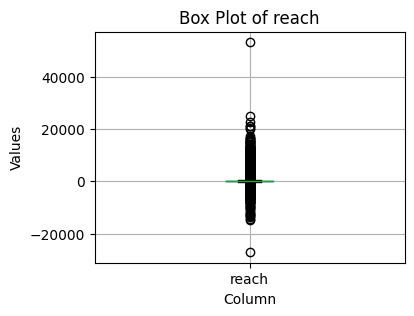

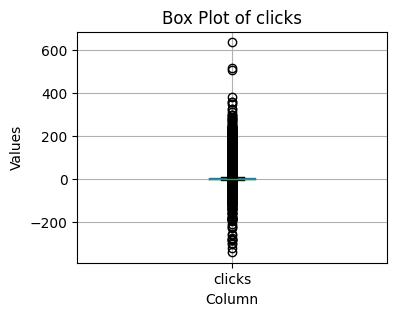

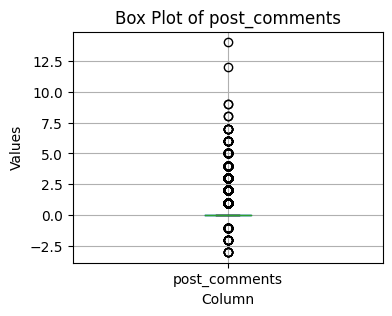

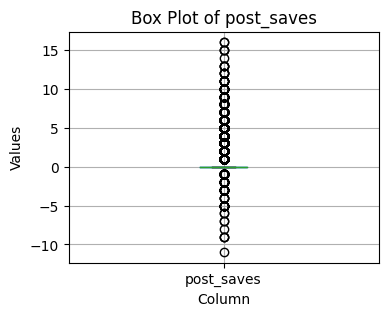

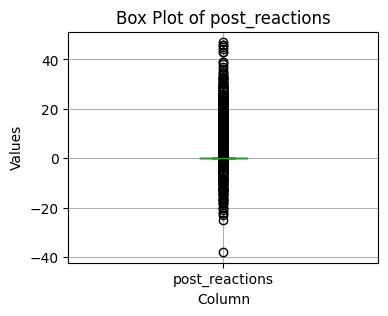

In [3]:
import matplotlib.pyplot as plt
for column in ['reach','clicks','post_comments','post_saves','post_reactions']:
    plt.figure(figsize=(4,3))  
    train_df.boxplot(column=column)
    plt.title(f'Box Plot of {column}')
    plt.xlabel('Column')
    plt.ylabel('Values')
plt.show()

In [4]:
import numpy as np
from scipy import stats
data = train_df[['reach','clicks','post_comments','post_saves','post_reactions']]
# Create a sample dataset (replace this with your dataset)
data = np.random.normal(loc=0, scale=1, size=(100, 3))


def remove_outliers(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    filtered_data = data[(z_scores < threshold).all(axis=1)]
    return filtered_data


filtered_data = remove_outliers(data)

# Print the shape of the original and filtered datasets
print("Original data shape:", data.shape)
print("Filtered data shape:", filtered_data.shape)

Original data shape: (100, 3)
Filtered data shape: (98, 3)


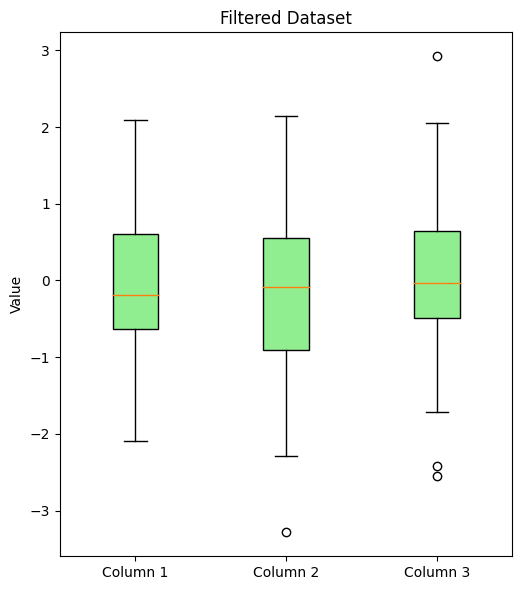

In [5]:
plt.figure(figsize=(10, 6))



# Filtered dataset
plt.subplot(1, 2, 2)
plt.boxplot(filtered_data, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Filtered Dataset')
plt.xticks(np.arange(1, len(filtered_data[0]) + 1), ['Column 1', 'Column 2', 'Column 3'])
plt.ylabel('Value')

plt.tight_layout()
plt.show()

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656419 entries, 0 to 656418
Data columns (total 65 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ad_id                   656419 non-null  int64  
 1   ad_set_id               656419 non-null  int64  
 2   campaign_id             656419 non-null  int64  
 3   product_id              635321 non-null  object 
 4   datetime                656419 non-null  object 
 5   account_id              656419 non-null  int64  
 6   post_id_emb             655733 non-null  object 
 7   post_type               655733 non-null  float64
 8   countries               654981 non-null  object 
 9   gender                  656419 non-null  int64  
 10  age_min                 656419 non-null  int64  
 11  age_max                 656419 non-null  int64  
 12  spend                   656419 non-null  float64
 13  impressions             656419 non-null  int64  
 14  reach               

In [7]:
train_df2 = train_df[[col for col in train_df.columns if train_df[col].dtypes in ['float64','int64']]]
train_df2

,ad_id,ad_set_id,campaign_id,account_id,post_type,gender,age_min,age_max,spend,impressions,...,cum_bounces,cum_sessions,cum_session_duration,cum_add_cart_num,cum_add_payment_info,cum_initiates_checkout,cum_purchase,cum_income_1,cum_income_2,roi
0,23848303658498562,23848131439913714,23848131439304807,196573582962558,2.0,0,18,65,0.28,22,...,NaN,NaN,NaN,0,2,6,2,51.96,0.0,0.0
1,23848303658498562,23848131439913714,23848131439304807,196573582962558,2.0,0,18,65,0.67,37,...,NaN,NaN,NaN,0,2,6,2,51.96,0.0,0.0
2,23848303658498562,23848131439913714,23848131439304807,196573582962558,2.0,0,18,65,0.89,41,...,NaN,NaN,NaN,0,2,6,2,51.96,0.0,0.0
3,23848303658498562,23848131439913714,23848131439304807,196573582962558,2.0,0,18,65,0.80,39,...,NaN,NaN,NaN,0,2,6,2,51.96,0.0,0.0
4,23848303658498562,23848131439913714,23848131439304807,196573582962558,2.0,0,18,65,0.75,67,...,NaN,NaN,NaN,0,2,6,2,51.96,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656414,23854588750229041,23854567221914193,23854567221245286,485542363759056,3.0,2,25,65,0.41,57,...,NaN,NaN,NaN,0,0,0,0,0.00,0.0,0.0
656415,23854588750229041,23854567221914193,23854567221245286,485542363759056,3.0,2,25,65,0.22,30,...,NaN,NaN,NaN,0,0,0,0,0.00,0.0,0.0
656416,23854588750229041,23854567221914193,23854567221245286,485542363759056,3.0,2,25,65,0.52,20,...,NaN,NaN,NaN,0,0,0,0,0.00,0.0,0.0
656417,23854588750229041,23854567221914193,23854567221245286,485542363759056,3.0,2,25,65,0.01,2,...,NaN,NaN,NaN,0,0,0,0,0.00,0.0,0.0


In [8]:
corr_matrix = train_df[[col for col in train_df.columns if train_df[col].dtypes in ['float64','int64']]].corr()
corr_matrix

,ad_id,ad_set_id,campaign_id,account_id,post_type,gender,age_min,age_max,spend,impressions,...,cum_bounces,cum_sessions,cum_session_duration,cum_add_cart_num,cum_add_payment_info,cum_initiates_checkout,cum_purchase,cum_income_1,cum_income_2,roi
ad_id,1.000000,0.949831,0.940003,-0.091259,0.176642,0.393762,0.042106,-0.159123,0.001678,0.031247,...,-0.260643,-0.250564,-0.209983,-0.174934,-0.174481,-0.119069,-0.186804,-0.163758,0.080026,-0.064489
ad_set_id,0.949831,1.000000,0.992387,-0.130260,0.187558,0.342010,0.094897,-0.158964,0.011411,0.024954,...,-0.250210,-0.240287,-0.198424,-0.168824,-0.172929,-0.130107,-0.183166,-0.155899,0.068960,-0.062696
campaign_id,0.940003,0.992387,1.000000,-0.130511,0.187292,0.337789,0.074111,-0.159717,0.014752,0.027408,...,-0.246291,-0.235895,-0.194630,-0.162749,-0.167587,-0.128080,-0.177833,-0.149827,0.069929,-0.060588
account_id,-0.091259,-0.130260,-0.130511,1.000000,-0.067400,-0.024314,0.147247,0.044064,0.051232,0.043610,...,0.112777,0.091545,0.051356,0.037318,0.024589,0.014241,0.031423,0.050533,0.037080,0.011515
post_type,0.176642,0.187558,0.187292,-0.067400,1.000000,0.183556,-0.047077,-0.073890,-0.002264,-0.011702,...,0.004148,0.003993,0.000945,-0.020867,-0.026459,-0.023303,-0.025443,-0.004416,0.037562,-0.023381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cum_initiates_checkout,-0.119069,-0.130107,-0.128080,0.014241,-0.023303,-0.059271,-0.143423,0.058286,0.235380,0.225870,...,0.787811,0.892098,0.938162,0.654631,0.910780,1.000000,0.904617,0.845020,0.453216,0.023668
cum_purchase,-0.186804,-0.183166,-0.177833,0.031423,-0.025443,-0.123753,-0.121302,0.077752,0.247007,0.209293,...,0.796287,0.900503,0.939486,0.809714,0.993531,0.904617,1.000000,0.906546,0.462924,0.035744
cum_income_1,-0.163758,-0.155899,-0.149827,0.050533,-0.004416,-0.120930,-0.088230,0.061318,0.312963,0.248513,...,0.796279,0.905951,0.943712,0.804772,0.895324,0.845020,0.906546,1.000000,0.509316,0.041532
cum_income_2,0.080026,0.068960,0.069929,0.037080,0.037562,-0.007909,-0.091793,-0.004483,0.194818,0.170658,...,0.306114,0.374080,0.375928,0.327518,0.473139,0.453216,0.462924,0.509316,1.000000,0.004424


In [9]:
train_df['income_per_seesion'] = train_df['cum_purchase']/train_df['cum_income_1']

In [10]:
train_df['post_id_emb'].nunique()

2615

In [11]:
from category_encoders import MEstimateEncoder

X_encode = train_df.sample(frac=0.25, random_state=42)
y_encode = X_encode['roi']
X_pretrain = train_df.drop(X_encode.index)
y_train = X_pretrain['roi']

encoder = MEstimateEncoder(cols=["post_id_emb",'product_id'], m=5.0)
encoder.fit(X_encode, y_encode)
X_train = encoder.transform(X_pretrain)
X_train.head()

,ad_id,ad_set_id,campaign_id,product_id,datetime,account_id,post_id_emb,post_type,countries,gender,...,cum_sessions,cum_session_duration,cum_add_cart_num,cum_add_payment_info,cum_initiates_checkout,cum_purchase,cum_income_1,cum_income_2,roi,income_per_seesion
1,23848303658498562,23848131439913714,23848131439304807,1.649161,2022-10-01 01:00:00,196573582962558,1.907526,2.0,"US,GB",0,...,NaN,NaN,0,2,6,2,51.96,0.0,0.0,0.038491
3,23848303658498562,23848131439913714,23848131439304807,1.649161,2022-10-01 03:00:00,196573582962558,1.907526,2.0,"US,GB",0,...,NaN,NaN,0,2,6,2,51.96,0.0,0.0,0.038491
4,23848303658498562,23848131439913714,23848131439304807,1.649161,2022-10-01 04:00:00,196573582962558,1.907526,2.0,"US,GB",0,...,NaN,NaN,0,2,6,2,51.96,0.0,0.0,0.038491
5,23848303658498562,23848131439913714,23848131439304807,1.649161,2022-10-01 05:00:00,196573582962558,1.907526,2.0,"US,GB",0,...,NaN,NaN,0,2,6,2,51.96,0.0,0.0,0.038491
8,23848303658498562,23848131439913714,23848131439304807,1.649161,2022-10-01 08:00:00,196573582962558,1.907526,2.0,"US,GB",0,...,NaN,NaN,0,2,6,2,51.96,0.0,0.0,0.038491


In [12]:
X_train
X = X_train[['ad_id','campaign_id','product_id','account_id','post_id_emb','cum_purchase','cum_income_1','cum_income_2']]
y = X_train['roi']
train_data = pd.merge(X,y,how='left',on=X.index)

In [13]:
train_df['ad_id']

0         23848303658498562
1         23848303658498562
2         23848303658498562
3         23848303658498562
4         23848303658498562
                ...        
656414    23854588750229041
656415    23854588750229041
656416    23854588750229041
656417    23854588750229041
656418    23854588750229041
Name: ad_id, Length: 656419, dtype: int64

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
train_df_imputed = pd.DataFrame(imputer.fit_transform(train_data), columns=train_data.columns)
train_df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492314 entries, 0 to 492313
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   key_0         492314 non-null  float64
 1   ad_id         492314 non-null  float64
 2   campaign_id   492314 non-null  float64
 3   product_id    492314 non-null  float64
 4   account_id    492314 non-null  float64
 5   post_id_emb   492314 non-null  float64
 6   cum_purchase  492314 non-null  float64
 7   cum_income_1  492314 non-null  float64
 8   cum_income_2  492314 non-null  float64
 9   roi           492314 non-null  float64
dtypes: float64(10)
memory usage: 37.6 MB


In [15]:
X = train_df_imputed.drop(columns=['roi'])
y = train_df_imputed['roi']
X

,key_0,ad_id,campaign_id,product_id,account_id,post_id_emb,cum_purchase,cum_income_1,cum_income_2
0,1.0,2.384830e+16,2.384813e+16,1.649161,1.965736e+14,1.907526,2.0,51.96,0.0
1,3.0,2.384830e+16,2.384813e+16,1.649161,1.965736e+14,1.907526,2.0,51.96,0.0
2,4.0,2.384830e+16,2.384813e+16,1.649161,1.965736e+14,1.907526,2.0,51.96,0.0
3,5.0,2.384830e+16,2.384813e+16,1.649161,1.965736e+14,1.907526,2.0,51.96,0.0
4,8.0,2.384830e+16,2.384813e+16,1.649161,1.965736e+14,1.907526,2.0,51.96,0.0
...,...,...,...,...,...,...,...,...,...
492309,656411.0,2.385459e+16,2.385457e+16,1.593400,4.855424e+14,1.007100,0.0,0.00,0.0
492310,656413.0,2.385459e+16,2.385457e+16,1.593400,4.855424e+14,1.007100,0.0,0.00,0.0
492311,656414.0,2.385459e+16,2.385457e+16,1.593400,4.855424e+14,1.007100,0.0,0.00,0.0
492312,656415.0,2.385459e+16,2.385457e+16,1.593400,4.855424e+14,1.007100,0.0,0.00,0.0


In [16]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_y,valid_y = train_test_split(X,y)

In [17]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(train_X,train_y)
preds = my_model.predict(valid_X)

In [18]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(valid_y,preds)
mae

1.4886461603658379

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}


grid_search = GridSearchCV(estimator=my_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_X, train_y)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

Best parameters: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 150}
Best score: -4.653398806083598


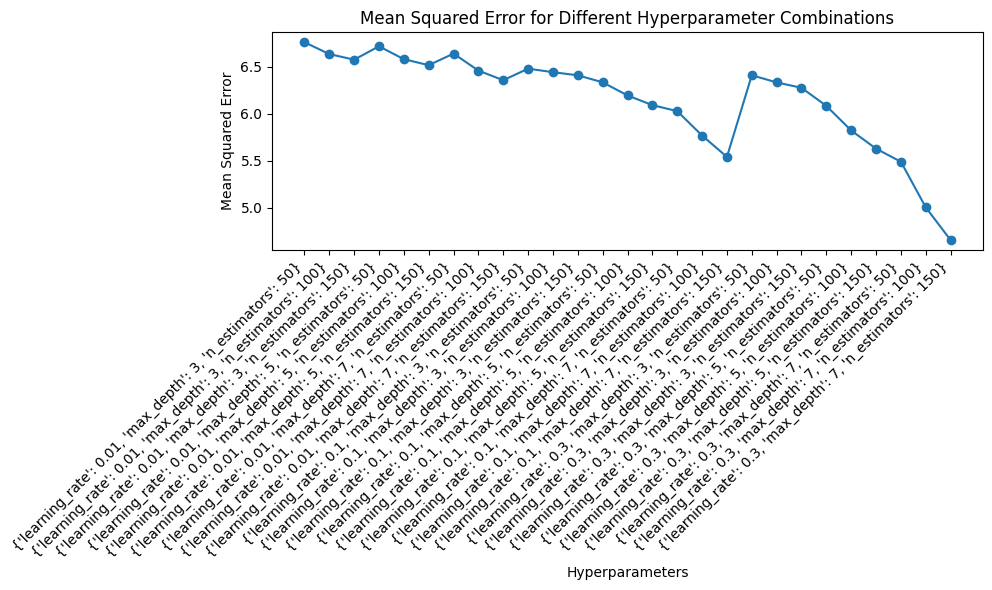

In [20]:
import matplotlib.pyplot as plt


results = grid_search.cv_results_
params = results['params']
mean_test_scores = results['mean_test_score']


hyperparameters = [str(param) for param in params]
mse_scores = [-score for score in mean_test_scores]  


plt.figure(figsize=(10, 6))
plt.plot(hyperparameters, mse_scores, marker='o')
plt.title('Mean Squared Error for Different Hyperparameter Combinations')
plt.xlabel('Hyperparameters')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [21]:
best_params = grid_search.best_params_
best_model = XGBRegressor(**best_params)
best_model.fit(train_X, train_y)
pred2 = best_model.predict(valid_X)
mae = mean_absolute_error(valid_y,pred2)
mae

1.364940889245053

In [22]:
final_valid = pd.DataFrame(index = valid_X.index)
final_valid['predicted_roi'] = pred2
final_valid['actual_roi'] = valid_y
final_valid.tail()

,predicted_roi,actual_roi
476332,2.155816,1.831419
89798,3.203075,0.000000
396110,1.101636,0.000000
140806,2.407073,0.000000
337094,1.803426,2.682992
